In [1]:
import gammapy 
print(f'loaded gammapy version: {gammapy.__version__} ' )
print(f'Supposed to be 0.20 (18-10-2022)' )

loaded gammapy version: 0.20.1 
Supposed to be 0.20 (18-10-2022)


In this notebook the angular size of the systematic is evaulated. Therefore, we compute the sqrt ts map of the standard anlysis and compute the 2D Fourier trafo of the first energybin. The obtained angular spectrum is compared with the one computed from a dataset consisting of statistical fluctuations only (asimov dataset). The spectrum of 1000 Poission draws of this asimov dataset are plotted and used for the standard deviation estimation of the anuglar spectrum points. 

In [2]:
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import astropy
from gammapy.maps import Map
from gammapy.datasets import MapDataset
from gammapy.modeling.models import Models, Model, SkyModel, FoVBackgroundModel
from gammapy.estimators import ExcessMapEstimator
from gammapy.modeling import Fit, Parameter, Parameters
from astropy.coordinates import SkyCoord, Angle
from regions import RectangleSkyRegion

import astropy.units as u
import yaml
import sys
#sys.path.append('/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/4-Fitting_nuisance_and_model_parameters')

import my_dataset_maps_20


spatial binsize =  [0.08] deg


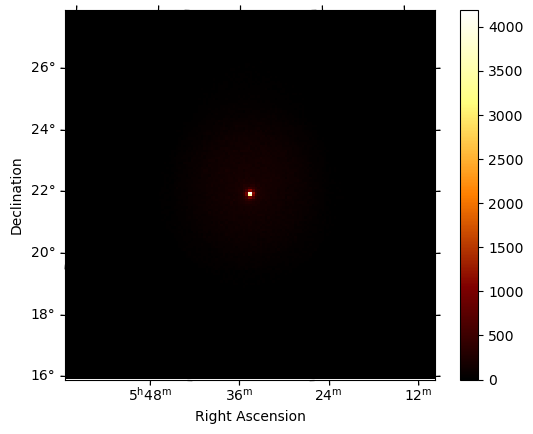

In [4]:
#source = 'GC_dataset_zeta_5_muoneffTrue_edispTrue'
path = '/home/vault/caph/mppi062h/repositories/HESS_3Dbkg_syserror/2-error_in_dataset'
source='Crab'

if source == "Crab":

    # here the dataset with the fine binning is saved
    dataset = MapDataset.read(f'{path}/{source}/stacked.fits')
    dataset = dataset.downsample(4)
    models = Models.read(f"{source}/standard_model.yml")
    
    with open(f"{source}/nui_bgmodel.yml", "r") as ymlfile:
        best_fit_bgmodel = yaml.load(ymlfile, Loader=yaml.FullLoader)
    bkg_model = FoVBackgroundModel(dataset_name=dataset.name)
    bkg_model.parameters['norm'].value = best_fit_bgmodel['spectral']['parameters'][0]['value']
    bkg_model.parameters['tilt'].value = best_fit_bgmodel['spectral']['parameters'][1]['value']
    bkg_model.parameters['norm'].error = best_fit_bgmodel['spectral']['parameters'][0]['error']
    bkg_model.parameters['tilt'].error = best_fit_bgmodel['spectral']['parameters'][1]['error']
    models.append(bkg_model)
    dataset.models = models


   
if "GC" in source:
    if source =="GC":
        path_GC ='/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/2-source_dataset/GC_0.19'
        dataset = MapDataset.read(f'{path_GC}/20220511_dataset002_hess1_muonflagTrue.fits')
        dataset.stack(MapDataset.read(f'{path_GC}/20220511_dataset002_hess2_muonflagTrue.fits'))
        dataset = dataset.downsample(4)
        
    
      

        # Define source model for stacked fit
        from gammapy.modeling.models import (PointSpatialModel, 
                                             ExpCutoffPowerLawSpectralModel,
                                             PowerLawSpectralModel,
                                             GaussianSpatialModel,TemplateSpatialModel,
                                            PowerLawNormSpectralModel)
        spatial_model_center = PointSpatialModel(lon_0=359.9439608*u.deg, lat_0=-0.0418969*u.deg, frame='galactic') 
        spectral_model_center = ExpCutoffPowerLawSpectralModel(index=2.14, amplitude="2.55e-12 cm-2 s-1 TeV-1", reference="1 TeV", lambda_='0.093 TeV-1')
        source_model_center = SkyModel(spatial_model=spatial_model_center, spectral_model=spectral_model_center, 
                                       name="src")

        spatial_model_g09 = PointSpatialModel(lon_0=0.8717549*u.deg, lat_0=0.0767488*u.deg, frame='galactic')
        spectral_model_g09 = PowerLawSpectralModel(index=2.4, amplitude="0.838e-12 cm-2 s-1 TeV-1", reference="1 TeV") # was 3e-12
        source_model_g09 = SkyModel(spatial_model=spatial_model_g09, spectral_model=spectral_model_g09, 
                                    name="g09")

        spatial_model_1745 = GaussianSpatialModel(lon_0=358.6435538*u.deg, lat_0=-0.5617789*u.deg, sigma=0.179*u.deg, frame='galactic')
        spectral_model_1745 = PowerLawSpectralModel(index=2.57, amplitude="1.73e-12 cm-2 s-1 TeV-1", reference="1 TeV") # 
        source_model_1745 = SkyModel(spatial_model=spatial_model_1745, spectral_model=spectral_model_1745, 
                                     name="1745")

        spatial_model_1746 = PointSpatialModel(lon_0=0.1384563*u.deg, lat_0=-0.1112664*u.deg, frame='galactic')
        spectral_model_1746 = PowerLawSpectralModel(index=2.17, amplitude="0.18e-12 cm-2 s-1 TeV-1", reference="1 TeV") # was 3e-12
        source_model_1746 = SkyModel(spatial_model=spatial_model_1746, spectral_model=spectral_model_1746, name="1746")

        spatial_model_1746308 = GaussianSpatialModel(lon_0=358.4479799*u.deg, lat_0=-1.1140008*u.deg, sigma=0.162*u.deg, frame='galactic')
        spectral_model_1746308 = PowerLawSpectralModel(index=3.27, amplitude="0.70e-12 cm-2 s-1 TeV-1", reference="1 TeV") #
        source_model_1746308 = SkyModel(spatial_model=spatial_model_1746308, spectral_model=spectral_model_1746308, name="1746308")

        spatial_model_1741 = PointSpatialModel(lon_0=358.2753545*u.deg, lat_0=0.0515537*u.deg, frame='galactic')
        spectral_model_1741 = PowerLawSpectralModel(index=2.30, amplitude="0.21e-12 cm-2 s-1 TeV-1", reference="1 TeV") # was 3e-12
        source_model_1741 = SkyModel(spatial_model=spatial_model_1741, spectral_model=spectral_model_1741, name="1741")


    
        diffuse_gal = Map.read("/home/saturn/caph/mppi043h/diffusiontemplate/cont_pcut_v3.fits")
        print(diffuse_gal.geom.axes[0].name)#= 'energy_true'
        template_diffuse = TemplateSpatialModel(
            diffuse_gal, normalize=False
        )
        diffuse_model = SkyModel(
            spectral_model=PowerLawNormSpectralModel(),
            spatial_model=template_diffuse,
            name="Diffuse Emission",)

        bkg_model = FoVBackgroundModel(dataset_name=dataset.name)
        bkg_model.parameters['tilt'].frozen  = False

        models = Models([source_model_center, source_model_g09, source_model_1745, source_model_1746, 
                         source_model_1746308, source_model_1741, diffuse_model, bkg_model ])
        dataset.models = models
        bound= 1
        delta=1
        if bound:
            dataset.models['src'].spatial_model.lon_0.min = 359.9439608-delta/2
            dataset.models['src'].spatial_model.lon_0.max = 359.9439608+delta/2
            dataset.models['src'].spatial_model.lat_0.min = -0.0418969-delta/2
            dataset.models['src'].spatial_model.lat_0.max = -0.0418969+delta/2
            dataset.models['g09'].spatial_model.lon_0.min = 0.8717549-delta/2
            dataset.models['g09'].spatial_model.lon_0.max = 0.8717549+delta/2
            dataset.models['g09'].spatial_model.lat_0.min = 0.0767488-delta/2
            dataset.models['g09'].spatial_model.lat_0.max = 0.0767488+delta/2
            dataset.models['1746'].spatial_model.lon_0.min = 0.1384563-delta/2#/2
            dataset.models['1746'].spatial_model.lon_0.max = 0.1384563+delta/2#/2
            dataset.models['1746'].spatial_model.lat_0.min = -0.1112664-delta/2#/2
            dataset.models['1746'].spatial_model.lat_0.max = -0.1112664+delta/2#/2
            dataset.models["1741"].spatial_model.lon_0.min = 358.2753545-delta/2
            dataset.models["1741"].spatial_model.lon_0.max = 358.2753545+delta/2
            dataset.models["1741"].spatial_model.lat_0.min = 0.0515537-delta/2
            dataset.models["1741"].spatial_model.lat_0.max = 0.0515537+delta/2

            dataset.models['1745'].spatial_model.lon_0.frozen = True
            dataset.models['1745'].spatial_model.lat_0.frozen = True                
            dataset.models['1745'].spatial_model.sigma.frozen = True
            dataset.models['1746308'].spatial_model.lon_0.frozen = True
            dataset.models['1746308'].spatial_model.lat_0.frozen = True                
            dataset.models['1746308'].spatial_model.sigma.frozen = True
    if source == 'GC_dataset_zeta_1_muoneffTrue_edispTrue':
        path_GC = '/home/vault/caph/mppi062h/repositories/GC/HESS/datasets_fits'
        dataset_standard = MapDataset.read(f'{path_GC}/dataset_zeta_1_muoneffTrue_edispTrue.fits')
        #dataset_standard = dataset_standard.downsample(8)
        models = Models.read(f'{source}/HESS_fixed_models.yml')
        print(models)
        dataset_standard.models = models
        
    if source == 'GC_dataset_zeta_5_muoneffTrue_edispTrue':
        path_GC = '/home/vault/caph/mppi062h/repositories/GC/HESS/datasets_fits'
        dataset = MapDataset.read(f'{path_GC}/dataset_zeta_5_muoneffTrue_edispTrue.fits')
        #dataset = dataset.downsample(8)
        models = Models.read(f'{source}/HESS_fixed_models.yml')
        print(models)
        dataset.models = models

        
    
    j1745_coord = SkyCoord(358.6435538, -0.5617789, unit='deg',frame='galactic')

    skyregion_1745 = RectangleSkyRegion(center=j1745_coord, width=1*u.deg,height=1*u.deg)
    geom_2d = dataset.geoms['geom'].drop('energy')
    dataset.mask_safe.data[:] &= Map.from_geom(geom_2d, 
                                                        data=geom_2d.region_mask([skyregion_1745], 
                                                                                          inside=False).data).data
    dataset.models = models
    ebins_display = 4, 7


    
    
dataset.counts.sum_over_axes().plot(add_cbar=1)
binsize = dataset.geoms["geom"].width[1] / dataset.geoms["geom"].data_shape[1]
print(
    "spatial binsize = ",
    binsize
)


In [5]:
%%time
fit_standarad = Fit(store_trace=False)
result_standarad = fit_standarad.run([dataset])

CPU times: user 3.67 s, sys: 53.3 ms, total: 3.72 s
Wall time: 3.74 s


import dataset and best fit model

In [6]:
print(
    "spatial binsize = ",
    dataset.geoms["geom"].width[1]
    / dataset.geoms["geom"].data_shape[1],
)


spatial binsize =  [0.08] deg


computation of the sqrt ts map

In [7]:
def get_residual(estart, eend, dataset_1 , smooth):
    res_1 = dataset_1.slice_by_energy(estart*u.TeV, eend*u.TeV).residuals( 'diff/sqrt(model)')
    return res_1.smooth(smooth*u.deg).sum_over_axes()
def get_residual3(estart, eend, dataset_1 , smooth):
    dat_1 = dataset_1
    res_1 = dat_1.counts - dat_1.npred()
    res_1.data /= np.sqrt(dat_1.npred().data)
    return res_1.smooth(smooth*u.deg).slice_by_idx(dict(energy = slice(estart, eend))).sum_over_axes()
def get_residual2(estart,eend, dataset_1, smooth):
    res_standard = (
        dataset_1.residuals("diff/sqrt(model)")
        .slice_by_idx(dict(energy=slice(estart,eend)))
        .smooth(smooth * u.deg)
            )
    return res_standard.sum_over_axes()

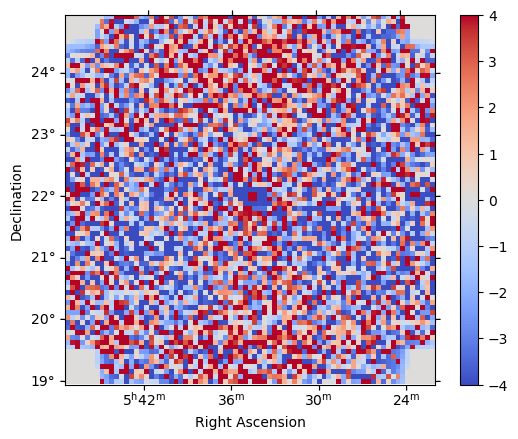

In [8]:
start, end =6,24
cutout = 6 *u.deg
N= 100
geom = dataset.geoms['geom']
result = get_residual2(start, end , dataset ,0.).cutout(geom.center_skydir, cutout)#.smooth(0.1*u.deg)
vmax =4
result.plot(add_cbar = 1, cmap = 'coolwarm', vmax = vmax, vmin = -vmax);

1000 Poission drawns of the Asimov dataset.

In [9]:
e_start, e_end = dataset.geoms['geom'].axes[0].edges[start],dataset.geoms['geom'].axes[0].edges[end]
observed  = result#.slice_by_idx(dict(energy=slice(start, end)))


res_stat_N = []
datasets_stat = dataset.copy()
datasets_stat.counts =  Map.from_geom(geom = datasets_stat.geoms['geom'])
for n in range(N):
    rng = np.random.RandomState()
    datasets_stat.counts.data = rng.poisson(datasets_stat.npred().data)
    
    result = get_residual2(start, end , datasets_stat ,0.).cutout(geom.center_skydir,cutout)
    res_stat_N.append(result)#["sqrt_ts"].slice_by_idx(dict(energy=slice(start, end))))

DatasetModels

Component 0: SkyModel

  Name                      : modelcrab
  Datasets names            : None
  Spectral model type       : LogParabolaSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   4.05e-11   +/- 3.4e-13 1 / (cm2 s TeV)
    reference             (frozen):      1.000       TeV         
    alpha                         :      2.605   +/-    0.01             
    beta                          :      0.065   +/-    0.01             
    lon_0                 (frozen):    184.557       deg         
    lat_0                 (frozen):     -5.784       deg         
    sigma                         :      0.003   +/-    0.00 deg         
    e                     (frozen):      0.000                   
    phi                   (frozen):      0.000       deg         

Component 1: FoVBackgroundModel

  Name                      : sjQNZSw5-bkg
  Datasets names            : 

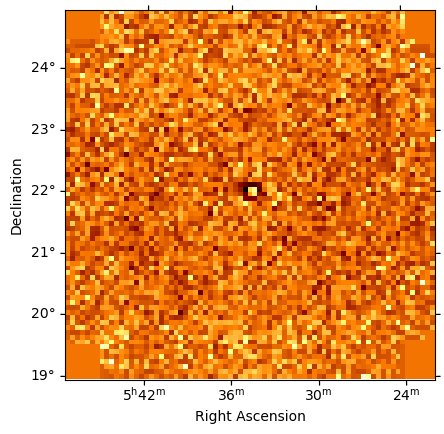

In [11]:
if source == "Crab":
    datasetN_path2 = '/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/output/'
    datasetN_path2 += '2022-03-22/'
    datasetN_path2 += 'Crab_max_sysamplitude_48.7_downsampling_factor_25_statthreshold1_estart_0.3_eend_120.0/'

    path = datasetN_path2
    dataset_N_10 = my_dataset_maps_20.MapDatasetNuisance.read(path+ 'nui_dataset.fits')
    with open(path+ 'nui_par.yml', "r") as ymlfile:
        nui_par = yaml.load(ymlfile, Loader=yaml.FullLoader)
    dataset_N_10.N_parameters = Parameters.from_dict(nui_par )
    with open(path+ 'nui_model.yml', "r") as ymlfile:
        best_fit_model = yaml.load(ymlfile, Loader=yaml.FullLoader)
    with open(path+ 'nui_bgmodel.yml', "r") as ymlfile:
        best_fit_bgmodel = yaml.load(ymlfile, Loader=yaml.FullLoader)
    bkg_model = FoVBackgroundModel(dataset_name=dataset_N_10.name)
    bkg_model.parameters['norm'].value = best_fit_bgmodel['spectral']['parameters'][0]['value']
    bkg_model.parameters['tilt'].value = best_fit_bgmodel['spectral']['parameters'][1]['value']
    models = Models.from_dict(best_fit_model )
    models.append(bkg_model)
    dataset_N_10.models =models
    print(dataset_N_10.models)

    emask_map = dataset_N_10.background.geom.energy_mask(
                    energy_min = 0.3*u.TeV,  energy_max =  120*u.TeV)
    dataset_N_10.mask_fit = emask_map
    dataset_N_10.mask_safe = emask_map

    result_N = get_residual2(start, end , dataset_N_10 ,0.).cutout(geom.center_skydir, cutout)
    result_N.plot()

Function used to compute the fourier tranfos of the observed residual and the statistical datasets

In [12]:
half_width_fov = cutout.value /2

def plot_fourier (res_dataset_v0s, stats_res = None, labels_datasets = None):
    #image = mpimg.imread("clouds.png")
    for i,res_dataset_v0 in enumerate(res_dataset_v0s):
        image =res_dataset_v0[0].data
        npix = image.shape[1]
        kfreq = np.fft.fftfreq(npix) * npix
        kfreq2D = np.meshgrid(kfreq, kfreq)
        knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
        knrm = knrm.flatten()
        kbins = np.arange(0.5, npix//2+1, 1.)
        kvals = 0.5 * (kbins[1:] + kbins[:-1])
        print('knrm', len(knrm))
        Abinss = []
        if labels_datasets[i] == 'Standard':
            color = default_colors[1]
        else:
            color = default_colors[1:][i]
        for d in res_dataset_v0:
            image =d.data
            image = np.nan_to_num(image)
            fourier_image = np.fft.fftn(image)
            fourier_amplitudes = np.abs(fourier_image)**2

            fourier_amplitudes = fourier_amplitudes.flatten()
            Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                                 statistic = "mean",
                                                 bins = kbins)
            Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
            plt.loglog(kvals, Abins, '-',#alpha = 0.001963,
                       alpha = 0.02, color = color, label = '')
            Abinss.append(Abins)
        label = ''
        if labels_datasets is not None:
            label += labels_datasets[i]
        plt.errorbar(x = kvals,y =  np.mean(Abinss, axis = 0),
                     yerr = np.std(Abinss,axis = 0), fmt= 'x-', 
                     alpha = 0.9,  label = label ,
                    color = color)
    if stats_res is not None:
        Abinss_stat = []
        for stats_re in stats_res:
            image =stats_re.data
            image = np.nan_to_num(image)

            fourier_image = np.fft.fftn(image)
            fourier_amplitudes = np.abs(fourier_image)**2
            fourier_amplitudes = fourier_amplitudes.flatten()
            Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                                 statistic = "mean",
                                                 bins = kbins)
            Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
            plt.loglog(kvals, Abins, '-',alpha = 5/N, color = 'black', label = '')
            Abinss_stat.append(Abins)
        #plt.loglog(kvals, np.mean(Abinss, axis = 0), 'x-',alpha = 0.9, color = 'black' ,label = 'Stat')
        plt.errorbar(x = kvals,y =  np.mean(Abinss_stat, axis = 0),
                     yerr = np.std(Abinss_stat,axis = 0),
                     fmt = '-',alpha = 0.9, color = 'black' ,label = 'Stat')


    ax = plt.gca() ;    fig = plt.gcf() ;    ax2 = ax.twiny()
    labels = ['1', '2', '5', '10', '20','25']

    def tick_function(X):
        return ["%.2f$^\circ$" % (half_width_fov/x) for x in X]
    ax2.set_xlim(ax.get_xlim())
    new_tick_locations = [1.,2.,5.,10.,20., 25.,]
    ax2.set_xticks(new_tick_locations) ;    ax2.set_xticklabels(tick_function(new_tick_locations))
    yy = ax.get_ylim()
    for i, data in enumerate(new_tick_locations):
        if i >-1:
            ax2.vlines(50/float(labels[::-1][i]), yy[0], yy[1], 
                       color = default_colors[:6][::-1][i],
                      alpha = 0.5)
    ax2.set_xscale('log') ;   ax2.set_xticks(new_tick_locations) ;ax2.set_xticklabels(tick_function(new_tick_locations))
    ax.set_xlabel("$k$") ;    ax2.set_xlabel("Angular Scale") ;    ax2.set_ylabel("Fourier Amplitude")
    ax.set_ylabel("$P(k)$") ;    plt.tight_layout();    plt.grid() ; 
    ax.legend(title= 'Stat+sys', loc = 'lower right')
    #plt.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")
    
    
    ## compute the size of the sys (i.e. look where the observed fourier is not within
    ## the 2simga of the mean
    
    i =0 
    stat_mean, stat_std = np.mean(Abinss_stat, axis = 0), np.std(Abinss_stat, axis = 0)
    observed = np.mean(Abinss, axis = 0)
    while ( ( (stat_mean[i]+ 2*stat_std[i]) < observed[i]) or ((stat_mean[i]- 2*stat_std[i]) > observed[i])):
        #print(((stat_mean[i]- 2*stat_std[i]) > observed[i]))
        i +=1
    size = half_width_fov/(i+1)
    print("Estimated angular size of the Sys:",size , " deg")

    return fig ,  size

In [13]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Resulting plot

knrm 5625
Estimated angular size of the Sys: 0.75  deg
saving in Crab/angular_size.txt ...


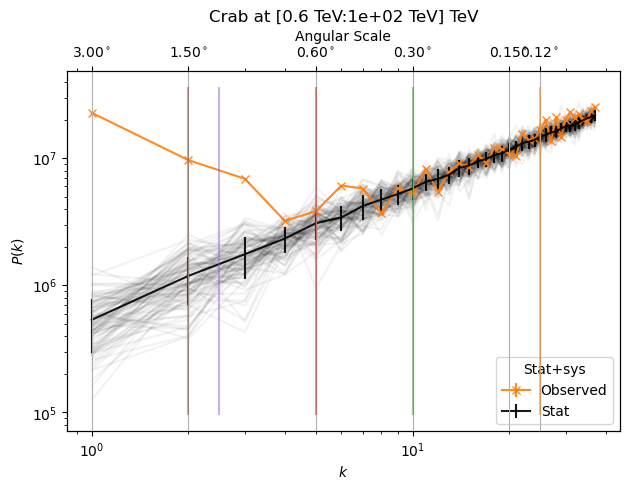

In [14]:
fig, size  = plot_fourier ([[observed]], res_stat_N, labels_datasets=['Observed'])
ax = plt.gca() ;ax.set_title("{} at [{:.1}:{:.1}] TeV".format(source, e_start, e_end));
fig = plt.gcf()
name = f'{source}'+'/plots/Angular_spectrum'  
fig.savefig(name+'.png', dpi=300, bbox_inches = 'tight')

outputpath = f'{source}/angular_size.txt'
print(f"saving in {outputpath} ...")
with open(outputpath, 'w') as f:
    f.write(str(size))

Interpretation:
- Diffraction pattern due to the edges visible in both the observed spectrum and stat 
- Deviation up to an angular scale of approx. 0.8 deg
- For this pariticular dataset the bisize of the nuisance parameters is recommendend in the same size. (downsampling : 10)

knrm 5625
knrm 5625
Estimated angular size of the Sys: 0.42857142857142855  deg


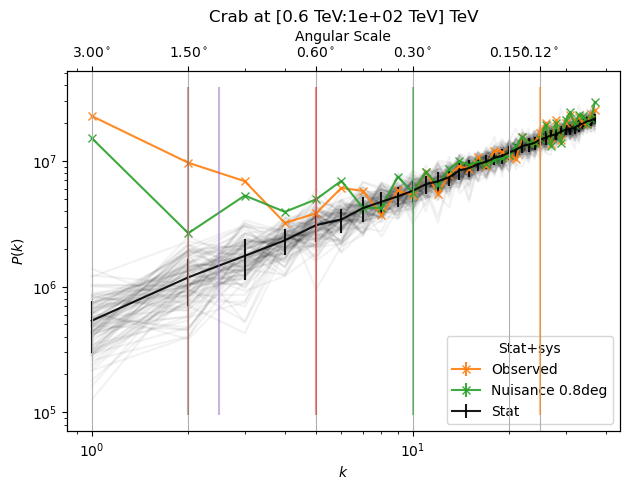

In [15]:
if source == "Crab":

    fig  = plot_fourier ([[observed],[result_N]], res_stat_N, labels_datasets=['Observed', "Nuisance 0.8deg"])
    ax = plt.gca() ;ax.set_title("{} at [{:.1}:{:.1}] TeV".format(source, e_start, e_end));
    fig = plt.gcf()
    name = f'{source}'+'/plots/Angular_spectrum_N'  
    fig.savefig(name+'.png', dpi=300, bbox_inches = 'tight')


